In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Table of Contents
Examples of matrix factorization include PCA and SVD. To understand matrix factorization we first have to understand Eigenvectors/values as well as the various interpretation of a matrix. 

* Interpretations of matrices
* EigenVectors & Eigenvalues
* PCA
* SVD

# Interpretations of Matrices

# PCA

### Motivating Example
The motivating example we'll use here is a block connected to a spring like so:

![](assets/block-spring.png)

The assumption is that we're unaware that the world consists of 3 dimensions, and that we're unaware that this contraption operates in 3 dimensions. So we actually point 6 (arbitrarily chosen number) cameras at varying angles to try and observe the process.

The recorded data will be stored in $X \in \mathbb{R}^{mxn}$. 
* Each column represents a recording at some time $t$ from each camera. 
* $m$ represents the number of cameras and is equal to 6 in our experiment. 
* $n$ represents the number of samples we took in the experiment.

### What does PCA do?
The goal of PCA is to find the basis which best re-expresses our data. Ofcourse, the question is, what does best re-express mean:
* PCA makes the assumption that dimensions of interest are those along which there is high variance.  

Let's take a look at what this assumption means with regards to our motivating example.

We're back in the world where it's obvious that the box-spring contraption operates in a 3-D world. The interesting mechanics of the process actually happen only along the x-axis. Sure, the ball will move every so slightly in the y and z axes, but the x-axis is the one that demonstrates the mechanics of the contraption (the force of the spring, friction etc).

PCA in fact can be seen as doing two things:
1. Find the number of dimensions that best re-express the data
2. Re-express the data using some n-dimensional basis

We'll focus our efforts on the latter. In the process we'll end up deriving the solution to the former as well. 

### Re-express the data in some n-dimensional basis

So effectively our goal is to take our data $X$ and represent is as $Y$ through a set of linear transformations. Why linear?
* PCA assumes only linear transformations in order to ensure performance <font color=red> Is this true? Is it the only reason? </font>

This means we want to solve for $P$ s.t.:
$$PX = Y$$

where $P \in \mathbb{R}^{rxm}$ and $Y \in \mathbb{R}^{rxn}$

### Noise & Redundancy 
<font color=red>Noise & Redundancy, And what else?</font>

In our motivating example, because of our 6 cameras, we're going to see redundancy. And because of the mechanics of the process we're interested in, there will also be noise (the small movements in the y and z axes that were mentioned earlier). 

PCA's goal is to find a basis which removes both.

#### Noise

Let's generate what noise might look like

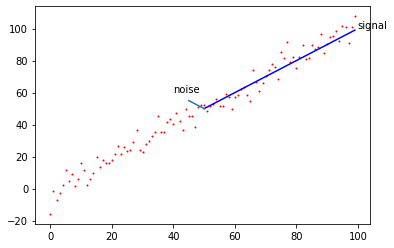

In [22]:
noise = np.random.normal(0,5,100)
x = np.arange(100)
y = x + noise

plt.scatter(x, y, s=1, c='red')
plt.plot(np.arange(50,100), np.arange(50,100), c='blue')
plt.plot(np.arange(45, 51), -1*np.arange(45, 51) + 100)
plt.text(40, 60, 'noise')
plt.text(100, 100, 'signal')
plt.show()

The dimension we're most interested in is along the $y = x$ line. The remainder are small movements in the $y$ and $z$ direction. 

#### Redundancy

Below see see several degrees of redundancy. The left most diagram shows that we need to keep both axes because one can't be estimated by the other, i.e. they're uncorrelated. 

The right-most diagram shows that there's a high level of redundancy. We can infact predict r1 if we knew r2, i.e. they're correlated. 

![](assets/redundancy-degrees.png)

### Mathematical Derivation

$$
PX = Y
\\~\\
C_{Y} = \frac{1}{n}YY^T
\\~\\
C_{Y} = \frac{1}{n}PX(PX)^T
\\~\\
C_{Y} = \frac{1}{n}PXX^TP^T
\\~\\
C_{Y} = PC_{X}P^T
$$

Our goal is to diagonalize the matrix $C_{Y}$ thereby ensuring that the re-expressed data, $Y$ has no correlations i.e. all redundancy has been removed

<font color=red>For this, we need to realize that any symmetric matrix A is diagonalized by an orthogonal matrix of its eignevectors, that is:</font>
$$
A = EDE^T
$$
where $E$ is the eigenvectors of A stacked as columns, and D is a diagnoal matrix. 

In the equations above, we want $C_{Y}$ to be the diagonal matrix. Therefore we must pick $P$ to be equal to $E^T$, that is $P$ is the eigenvectors of $C_{X}$ stacked as rows.

$$
C_{Y} = P(EDE^{T})P^{T}
\\~\\
C_{Y} = P(P^{T}DP)P^{T}
\\~\\
C_{Y} = PP^TDPP^T
\\~\\
C_{Y} = PP^{-1}DPP^{-1}
\\~\\
C_{Y} = D
$$

Where in the last line we used the fact <font color=red>$P^{T} = P^{-1}$</font>

Thus we've proved that if we choose $P = E^{T}$, we can diagonalize $C_{Y}$

# Questions
<font color=red>Why is $C_{Y}$ diagonalized completely.</font> What does that mean for the data exactly? I think to fully understand this, I need to understand eigenvectors and eigenvalues. I need to understand the vectors that diagonalize the covariance matrix of X. 

**Highly correlated**

In [35]:
pca = PCA(n_components=2)
X = np.stack((x, y), axis=1)
Y = pca.fit_transform(X)

In [37]:
X.shape

(100, 2)

In [36]:
Y.shape

(100, 2)

(-80.0, 80.0)

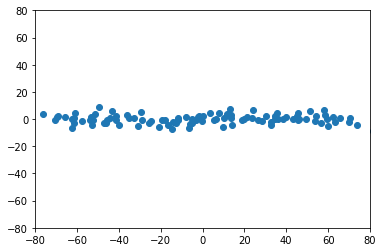

In [45]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlim(-80, 80)
plt.ylim(-80, 80)

In [41]:
np.cov(Y.T)

array([[1.78981838e+03, 1.57669295e-15],
       [1.57669295e-15, 1.10616036e+01]])

**Highly Uncorrelated**

How is it possible, that when I take seemingly uncorrelated data and try to find the 

In [55]:
noise = np.random.normal(0,100,100)
y = np.ones(100) + noise + 1

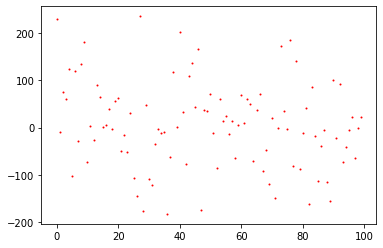

In [56]:
plt.scatter(x, y, s=1, c='red')

In [57]:
pca = PCA(n_components=2)
X = np.stack((x, y), axis=1)
Y = pca.fit_transform(X)

In [58]:
np.cov(Y.T)

array([[8.43662238e+03, 2.26291424e-15],
       [2.26291424e-15, 8.13807964e+02]])

(-100.0, 100.0)

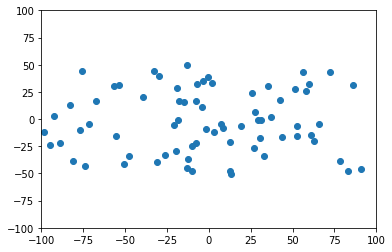

In [59]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlim(-100, 100)
plt.ylim(-100, 100)

# Resources

This tutorial describes the mathematics behind PCA really well: https://arxiv.org/pdf/1404.1100.pdf